In [2]:
import glob, os

folder_clean = 'D:\\Atom\\python\\data\\cleaned\\grill\\final'

data = {}

d_f = pd.read_csv(os.path.join(folder_clean, 'd6_vinegar_f_kde.csv'))
d_t = pd.read_csv(os.path.join(folder_clean, 'd6_vinegar_t_kde.csv'))
data['v_rssi_f'] = d_f['RSSI'].values
data['v_rssi_t'] = d_t['RSSI'].values
data['v_phase_f'] = d_f['PHASE'].values
data['v_phase_t'] = d_t['PHASE'].values

import scipy.io
scipy.io.savemat('vinegar.mat',data)

In [8]:

import os
folder_clean = 'D:\\Atom\\python\\data\\cleaned\\grill\\final'

def getdata(matls, dists):  
    data = {}
    for matl in matls:
        for d in dists:
            d_f = pd.read_csv(os.path.join(folder_clean, 'd%d_%s_f_kde.csv') % (d, matl))
            d_t = pd.read_csv(os.path.join(folder_clean, 'd%d_%s_t_kde.csv') % (d, matl))
            print(matl, d, len(d_f), len(d_t))
            plt.scatter(np.unwrap(d_f['PHASE']) - np.unwrap(d_t['PHASE']), d_f['RSSI'] - d_t['RSSI'])
            data['d%d_%s_rssi_f' % (d, matl)] = d_f['RSSI'].values
            data['d%d_%s_rssi_t' % (d, matl)] = d_t['RSSI'].values
            data['d%d_%s_phase_f' % (d, matl)] = d_f['PHASE'].values
            data['d%d_%s_phase_t' % (d, matl)] = d_t['PHASE'].values
    return data

import scipy.io
def export(filename, data):
    scipy.io.savemat('%s.mat' % filename, data)

water 101 50 50
water 102 50 50
water 103 50 50
water 104 50 50
water 105 50 50
oil 101 50 50
oil 102 50 50
oil 103 50 50
oil 104 50 50
oil 105 50 50
water 10 50 50
oil 11 50 50


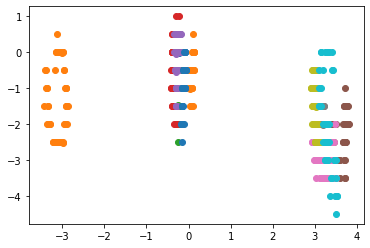

In [12]:
data1 = getdata(['water', 'oil'], [101, 102, 103, 104, 105])
data2 = getdata(['water'], [10])
data3 = getdata(['oil'], [11])
export('angle', {**data1, **data2, **data3})